# Radiospecta

* Sunpy provisionally affiliated package.
* Provides `Fido` clients for a number of space and ground based observatories or observatory networks
  * RSTN, EOVSA, WIND/WAVES, STEREO WAVES, Parker Solar Probe/RFS, CALLISOTO
* Provides a `Spectrogram` object or container like `TimeSeries` or `Map` but for dynamic spectra or spectrograms
* Docs https://docs.sunpy.org/projects/radiospectra/en/latest/

## Imports

In [15]:
from datetime import datetime

import astropy.units as u
import numpy as np

from astropy.time import Time
from astropy.io import fits
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

from sunpy.net import Fido, attrs as a

from radiospectra import net #let Fido know about the radio clients
from radiospectra.spectrogram2 import Spectrogram # in the process of updating old spectrogram

# What can be searched for?

In [16]:
Fido

Client,Description
EVEClient,Provides access to Level 0C Extreme ultraviolet Variability Experiment (EVE) data.
GBMClient,Provides access to data from the Gamma-Ray Burst Monitor (GBM) instrument on board the Fermi satellite.
XRSClient,Provides access to the GOES XRS fits files archive.
SUVIClient,Provides access to data from the GOES Solar Ultraviolet Imager (SUVI).
GONGClient,Provides access to the Magnetogram products of NSO-GONG synoptic Maps.
...,...
CALLISTOClient,"Provides access to eCallisto radio spectrometer network `archive <http://soleil80.cs.technik.fhnw.ch/solarradio/data/2002-20yy_Callisto/>`__ at `FHNW, <https://spdf.gsfc.nasa.gov>`__."
EOVSAClient,Client provides access to `Extended Owens Valley Solar Array <http://www.ovsa.njit.edu>`__ (EOVSA) data.
RFSClient,Provides access to Parker Solar Probe FIELDS Radio Frequency Spectrometer data `archive <https://spdf.gsfc.nasa.gov/pub/data/psp/fields/>`__ at `NASA Goddard Space Physics Data Facility (SPDF) <https://spdf.gsfc.nasa.gov>`__.
RSTNClient,Radio Spectrometer Telescope Network (RSTN) hosted at NOAA `National Geophysical Data <https://www.ngdc.noaa.gov>`__ (NGDC) archive.


In [18]:
a.Instrument.waves   #try .waves .swave .rstn .ecallisto

<sunpy.net.attrs.Instrument(WAVES: WIND - Waves) object at 0x117724c88>

# Lets look for a lot of radio data from 2017-09-02 15:00 - 18:00
* Use `Fido` like yesterday but specifiy different instruments
* `|` can be used as `or` so instrument `a or b` is `a | b`
* Search for data from WIND/WAVES, RSTN, CALLISTO, and SWAVES

In [19]:
query = Fido.search(a.Time('2017-09-02T15:00', '2017-09-02T18:00'), 
                    a.Instrument.waves | a.Instrument.rstn | a.Instrument.ecallisto | a.Instrument.swaves)

/Users/shane/.virtualenvs/stellar-sww/lib/python3.7/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


Print the results and see what was found

In [20]:
query

<sunpy.net.fido_factory.UnifiedResponse object at 0x118d6cf98>
Results from 5 Providers:

2 Results from the WAVESClient:
       Start Time               End Time        Instrument Source Provider   Wavelength [2] 
                                                                                  kHz       
----------------------- ----------------------- ---------- ------ -------- -----------------
2017-09-02 00:00:00.000 2017-09-02 23:59:59.999      WAVES   WIND     NASA    20.0 .. 1040.0
2017-09-02 00:00:00.000 2017-09-02 23:59:59.999      WAVES   WIND     NASA 1075.0 .. 13825.0

2 Results from the RSTNClient:
       Start Time               End Time        Provider Instrument Observatory
----------------------- ----------------------- -------- ---------- -----------
2017-09-02 00:00:00.000 2017-09-02 23:59:59.999     RSTN       RSTN   Learmonth
2017-09-02 00:00:00.000 2017-09-02 23:59:59.999     RSTN       RSTN    San Vito

402 Results from the CALLISTOClient:
       Start Time               End Time         Provider Instrument Observatory   ID
----------------------- ----------------------- --------- ---------- ------------ ---
2017-09-02 15:00:00.000 2017-09-02 15:14:59.999 ECALLISTO  ECALLISTO ALASKA-COHOE   0
2017-09-02 15:00:00.000 2017-09-02 15:14:59.999 ECALLISTO  ECALLISTO ALASKA-COHOE   1
2017-09-02 15:15:00.000 2017-09-02 15:29:59.999 ECALLISTO  ECALLISTO ALASKA-COHOE   0
2017-09-02 15:15:00.000 2017-09-02 15:29:59.999 ECALLISTO  ECALLISTO ALASKA-COHOE   1
2017-09-02 15:30:00.000 2017-09-02 15:44:59.999 ECALLISTO  ECALLISTO ALASKA-COHOE   0
2017-09-02 15:30:00.000 2017-09-02 15:44:59.999 ECALLISTO  ECALLISTO ALASKA-COHOE   1
2017-09-02 15:45:00.000 2017-09-02 15:59:59.999 ECALLISTO  ECALLISTO ALASKA-COHOE   0
                    ...                     ...       ...        ...          ... ...
2017-09-02 16:15:00.000 2017-09-02 16:29:59.999 ECALLISTO  ECALLISTO         ZSTS  59
2017-09-02 16:30:00.000 2017-09-02 16:44:59.999 ECALLISTO  ECALLISTO         ZSTS  59
2017-09-02 16:45:00.000 2017-09-02 16:59:59.999 ECALLISTO  ECALLISTO         ZSTS  59
2017-09-02 17:00:00.000 2017-09-02 17:14:59.999 ECALLISTO  ECALLISTO         ZSTS  59
2017-09-02 17:15:00.000 2017-09-02 17:29:59.999 ECALLISTO  ECALLISTO         ZSTS  59
2017-09-02 17:30:00.000 2017-09-02 17:44:59.999 ECALLISTO  ECALLISTO         ZSTS  59
2017-09-02 17:45:00.000 2017-09-02 17:59:59.999 ECALLISTO  ECALLISTO         ZSTS  59
2017-09-02 18:00:00.000 2017-09-02 18:14:59.999 ECALLISTO  ECALLISTO         ZSTS  59
Length = 402 rows

4 Results from the VSOClient:
       Start Time               End Time         Source  Instrument Wavelength [2] Provider Wavetype   Size     Info  
                                                                         MHz                          Mibyte          
----------------------- ----------------------- -------- ---------- -------------- -------- -------- ------- ---------
2017-09-02 00:00:00.000 2017-09-03 00:00:00.000 STEREO_A     SWAVES  0.125 .. 16.0      SSC    BROAD 3.51668 HFR ;  ; 
2017-09-02 00:00:00.000 2017-09-03 00:00:00.000 STEREO_A     SWAVES   0.01 .. 0.16      SSC    BROAD 0.53499 LFR ;  ; 
2017-09-02 00:00:00.000 2017-09-03 00:00:00.000 STEREO_A     SWAVES  0.125 .. 16.0      SSC    BROAD 3.51668 HFR ;  ; 
2017-09-02 00:00:00.000 2017-09-03 00:00:00.000 STEREO_A     SWAVES   0.01 .. 0.16      SSC    BROAD 0.53499 LFR ;  ; 

2 Results from the SWAVESClient:
       Start Time               End Time        Instrument Source Spacecraft Provider  Wavelength [2] 
                                                                                            kHz       
----------------------- ----------------------- ---------- ------ ---------- -------- ----------------
2017-09-02 00:00:00.000 2017-09-02 23:59:59.999     SWAVES STEREO          a     NASA    10.0 .. 160.0
2017-09-02 00:00:00.000 2017-09-02 23:59:59.999     SWAVES STEREO          a     NASA 125.0 .. 16000.0

# Many results let try RSTN

* First download the the data
* Same as yesterday can just pass the query to `Fido.fetch`

In [21]:
rstn_files = Fido.fetch(query['rstn'])

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

SSL error in data received
protocol: <asyncio.sslproto.SSLProtocol object at 0x11732db38>
transport: <_SelectorSocketTransport fd=86 read=polling write=<idle, bufsize=0>>
Traceback (most recent call last):
  File "/Users/shane/.pyenv/versions/3.7.0/lib/python3.7/asyncio/sslproto.py", line 526, in data_received
    ssldata, appdata = self._sslpipe.feed_ssldata(data)
  File "/Users/shane/.pyenv/versions/3.7.0/lib/python3.7/asyncio/sslproto.py", line 207, in feed_ssldata
    self._sslobj.unwrap()
  File "/Users/shane/.pyenv/versions/3.7.0/lib/python3.7/ssl.py", line 767, in unwrap
    return self._sslobj.shutdown()
ssl.SSLError: [SSL: KRB5_S_INIT] application data after close notify (_ssl.c:2580)


The `Fido.fetch` call basially returns a lis of filepaths e.g

In [23]:
rstn_files

['/Users/shane/sunpy/data/sv170902.srs.gz', '/Users/shane/sunpy/data/lm170902.srs.gz']

## Load into spectrograms 

* Very similar to `Map` and `TimeSeries` the `Spectrogram` can take a list of:
   * data header pairs
   * filepaths
   * urls
   * or a combinatino of the above
* Since fido returns a list of file paths we can just pass this directly to `Spectrogram`

In [24]:
rstn_spec = Spectrogram(sorted(rstn_files))

Since we gave it a list of filepaths should get back a list of spectrograms

In [25]:
type(rstn_spec), len(rstn_spec)

(list, 2)

Finnally spectrogram hava short repr or text representation

In [26]:
rstn_spec[0]

<RSTNSpectrogram LEARMONTH, RSTN, RSTN 25000.0 kHz - 180000.0 kHz, 2017-09-01T22:34:14.000 to 2017-09-02T10:03:13.000>

Once the data is loaded into a spectrogram it can be easily plotted using the `plot` method and the plots
can be adjusted like a normal matplotlib plt 

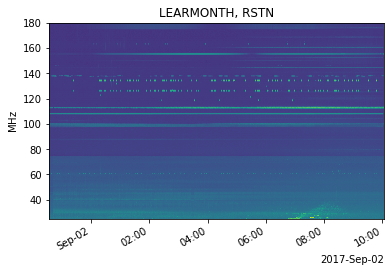

In [27]:
rstn_spec[0].plot()

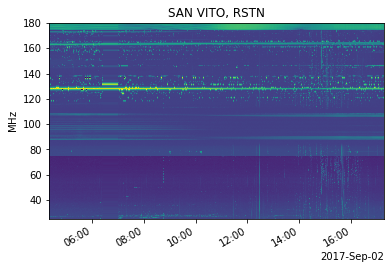

In [28]:
rstn_spec[1].plot()

There isn't an obvious radio busrt in the RSTN data so move on to WAVES

## Now do the same steps but for waves
* Remeber you can access the waves part of the query using `query['waves']`

Download WAVES

In [31]:
# Code to download the waves do here

waves_files = Fido.fetch(query['waves'])

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

SSL error in data received
protocol: <asyncio.sslproto.SSLProtocol object at 0x118c48f98>
transport: <_SelectorSocketTransport fd=98 read=polling write=<idle, bufsize=0>>
Traceback (most recent call last):
  File "/Users/shane/.pyenv/versions/3.7.0/lib/python3.7/asyncio/sslproto.py", line 526, in data_received
    ssldata, appdata = self._sslpipe.feed_ssldata(data)
  File "/Users/shane/.pyenv/versions/3.7.0/lib/python3.7/asyncio/sslproto.py", line 207, in feed_ssldata
    self._sslobj.unwrap()
  File "/Users/shane/.pyenv/versions/3.7.0/lib/python3.7/ssl.py", line 767, in unwrap
    return self._sslobj.shutdown()
ssl.SSLError: [SSL: KRB5_S_INIT] application data after close notify (_ssl.c:2580)
SSL error in data received
protocol: <asyncio.sslproto.SSLProtocol object at 0x118c48d68>
transport: <_SelectorSocketTransport fd=99 read=polling write=<idle, bufsize=0>>
Traceback (most recent call last):
  File "/Users/shane/.pyenv/versions/3.7.0/lib/python3.7/asyncio/sslproto.py", line 526, in

Load into spectrogram

In [43]:
# Load
waves_spec = Spectrogram(sorted(waves_files))

What is the type and size of the result

In [44]:
# Check the type and length here
type(waves_spec), len(waves_spec)

(list, 2)

Print a string reprentation a WAVES spectrogmram

In [45]:
waves_spec[0]

<WAVESSpectrogram WIND, WAVES, RAD1 20.0 kHz - 1040.0 kHz, 2017-09-02T00:00:00.000 to 2017-09-02T23:59:59.000>

Plot the WAVES spectrogram

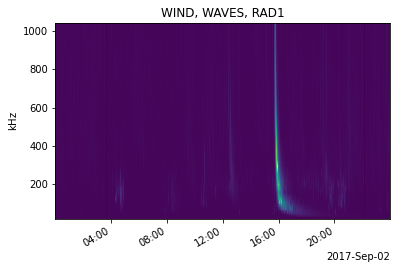

In [46]:
waves_spec[0].plot()

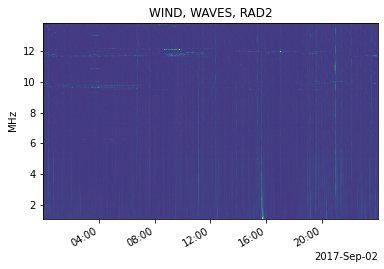

In [47]:
waves_spec[1].plot()

### Waves data looks like it captured a burst let make a nicer figure

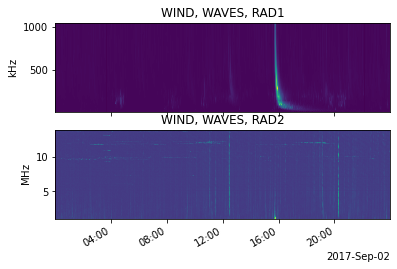

In [50]:
fig, axes = plt.subplots(2, 1, sharex=True)

waves_spec[0].plot(axes=axes[0])
waves_spec[1].plot(axes=axes[1])

(13.825, 1.075)

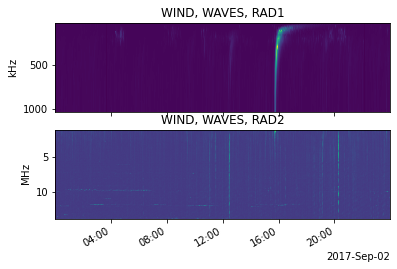

In [51]:
fig, axes = plt.subplots(2, 1, sharex=True)

waves_spec[0].plot(axes=axes[0])
waves_spec[1].plot(axes=axes[1])

# by default y-axis low to hight flip so moving away fro sun with time
axes[0].set_ylim(reversed(axes[0].get_ylim()))
axes[1].set_ylim(reversed(axes[1].get_ylim()))

#

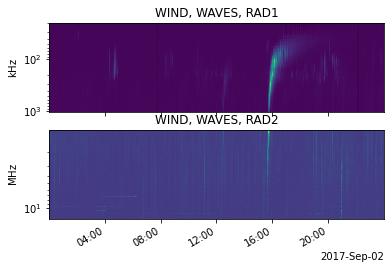

In [52]:
fig, axes = plt.subplots(2, 1, sharex=True)

waves_spec[0].plot(axes=axes[0])
waves_spec[1].plot(axes=axes[1])

# by default y-axis low to hight flip so moving away fro sun with time
axes[0].set_ylim(reversed(axes[0].get_ylim()))
axes[1].set_ylim(reversed(axes[1].get_ylim()))

# log y-axis
axes[0].set_yscale('log')
axes[1].set_yscale('log')

(17411.625, 17411.75)

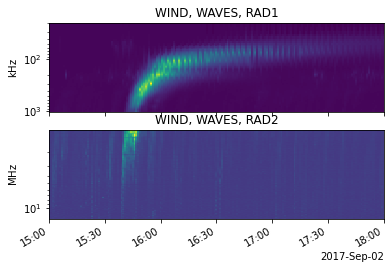

In [53]:
from datetime import datetime

fig, axes = plt.subplots(2, 1, sharex=True)

waves_spec[0].plot(axes=axes[0])
waves_spec[1].plot(axes=axes[1])

# by default y-axis low to hight flip so moving away fro sun with time
axes[0].set_ylim(reversed(axes[0].get_ylim()))
axes[1].set_ylim(reversed(axes[1].get_ylim()))

# log y-axis
axes[0].set_yscale('log')
axes[1].set_yscale('log')

axes[1].set_xlim(datetime(2017, 9, 2, 15), datetime(2017, 9, 2, 18))

# Find some callisto data?
* http://soleil.i4ds.ch/solarradio/callistoQuicklooks/?date=20170902
* Glasgow data looks good, what about others?

In [94]:
cids = (query['CALLISTO']['Observatory'] == 'GREENLAND') & (query['CALLISTO']['ID'] == 62)
callisto_files = Fido.fetch(query['CALLISTO'][cids], max_conn=1)
callisto_files = Fido.fetch(callisto_files)

Files Downloaded:   0%|          | 0/12 [00:00<?, ?file/s]

Files Downloaded: 0file [00:00, ?file/s]

In [95]:
callisto_specs = Spectrogram(callisto_files, silence_errors=True)

callisto_specs

[<CALISTOSpectrogram GREENLAND, E-CALLISTO, E-CALLISTO 10000.0 kHz - 105813.00354003906 kHz, 2017-09-02T15:40:07.430 to 2017-09-02T15:55:07.000>,
 <CALISTOSpectrogram GREENLAND, E-CALLISTO, E-CALLISTO 10000.0 kHz - 105813.00354003906 kHz, 2017-09-02T17:55:07.619 to 2017-09-02T18:10:07.000>,
 <CALISTOSpectrogram GREENLAND, E-CALLISTO, E-CALLISTO 10000.0 kHz - 105813.00354003906 kHz, 2017-09-02T16:10:07.376 to 2017-09-02T16:25:07.000>,
 <CALISTOSpectrogram GREENLAND, E-CALLISTO, E-CALLISTO 10000.0 kHz - 105813.00354003906 kHz, 2017-09-02T17:40:07.560 to 2017-09-02T17:55:07.000>,
 <CALISTOSpectrogram GREENLAND, E-CALLISTO, E-CALLISTO 10000.0 kHz - 105813.00354003906 kHz, 2017-09-02T16:55:07.554 to 2017-09-02T17:10:07.000>,
 <CALISTOSpectrogram GREENLAND, E-CALLISTO, E-CALLISTO 10000.0 kHz - 105813.00354003906 kHz, 2017-09-02T17:25:07.501 to 2017-09-02T17:40:07.000>,
 <CALISTOSpectrogram GREENLAND, E-CALLISTO, E-CALLISTO 10000.0 kHz - 105813.00354003906 kHz, 2017-09-02T15:10:07.311 to 2017

[None, None, None, None, None, None, None, None, None, None, None, None]

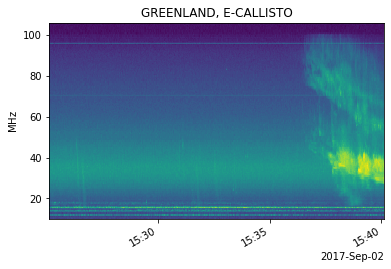

In [96]:
fig, axes = plt.subplots()
[sp.plot(axes=axes) for sp in callisto_specs]

# Load data not supported by Spectrogram

In [63]:
data = np.zeros((200, 200))
data[50:150, 50:150] = 1
times = Time('2017-09-02 15:00') + np.arange(200) * u.s
freqs = np.linspace(10, 20, 200) * u.GHz

# expects at least the following meta data
meta = {
    'observatory': 'some place',
    'instrument': 'an instrument',
    'detector': 'the detector',
    'freqs': freqs,
    'times': times,
    'wavelength': a.Wavelength(freqs[0], freqs[-1]),
    'start_time': times[0],
    'end_time': times[-1]
}
super_spec = Spectrogram(data, meta )

In [64]:
super_spec

<GenericSpectrogram SOME PLACE, AN INSTRUMENT, THE DETECTOR 10000000.0 kHz - 20000000.0 kHz, 2017-09-02T15:00:00.000 to 2017-09-02T15:03:19.000>

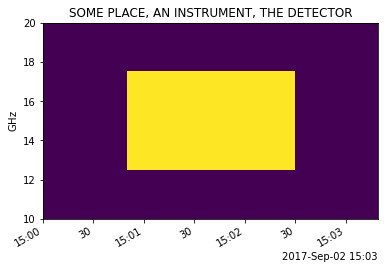

In [65]:
super_spec.plot()

# Use the Orfee web site to find and dowload data
* Download data to you local machine
*  

In [66]:
orfee = fits.open('https://drive.google.com/uc?export=download&id=1vcRra0MAUzEbjphwXK8hBFiP8QM7wNOV')
# orfee = fits.open(<path goes here>)
orfee

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1184fd2e8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x118507208>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1184ff828>]

In [67]:
orfee_i = np.hstack([orfee[2].data[f'STOKESI_B{i}'] for i in range(1, 6)]).T
orfee_v = np.hstack([orfee[2].data[f'STOKESV_B{i}'] for i in range(1, 6)]).T

orfee_time_str = orfee[0].header['DATE-OBS'] #+ 'T' + orfee[0].header['TIME-OBS']
# orfee_time_str = orfee_time_str[:-4] +'.' + orfee_time_str[-3:]

orfee_times = Time(orfee_time_str) + (orfee[2].data['TIME_B1']/1000)*u.s # times are not the same for all sub spectra!
orfee_freqs = np.hstack([orfee[1].data[f'FREQ_B{i}'] for i in range(1, 6)]) *u.MHz

In [68]:
orfee_meta = {
    'observatory': orfee[0].header['ORIGIN'],
    'instrument': orfee[0].header['INSTRUME'],
    'detector': orfee[0].header['INSTRUME'],
    'freqs': orfee_freqs.reshape(-1),
    'times': orfee_times,
    'wavelength': a.Wavelength(orfee_freqs[0,0], orfee_freqs[0,-1]),
    'start_time': orfee_times[0],
    'end_time': orfee_times[-1]
}
orfee_spec_i = Spectrogram(orfee_i, orfee_meta)
orfee_spec_v = Spectrogram(orfee_v, orfee_meta)
orfee_spec_i

<GenericSpectrogram OBSERVATOIRE DE NANCAY FRANCE, ORFEES, ORFEES 144130.0048828125 kHz - 1004700.0122070312 kHz, 2017-09-02T15:00:05.392 to 2017-09-02T16:51:00.392>

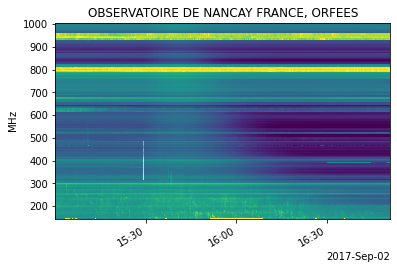

In [69]:
vmm = np.percentile(orfee_spec_i.data, [1,99])
orfee_spec_i.plot(norm=LogNorm(vmin=vmm[0], vmax=vmm[1]))


(1004.7000122070312, 144.1300048828125)

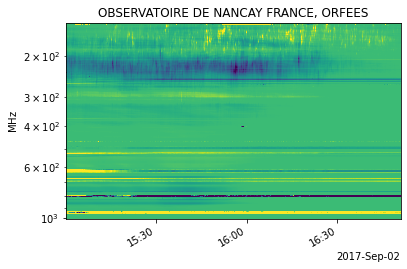

In [70]:
vmm = np.percentile(orfee_spec_v.data, [1,99])
orfee_spec_v.plot(vmin=vmm[0], vmax=vmm[1])
plt.semilogy()
plt.ylim(plt.ylim()[::-1])

# Final combined plot 1 GHz to 1 kHz

(17411.625, 17411.708333333332)

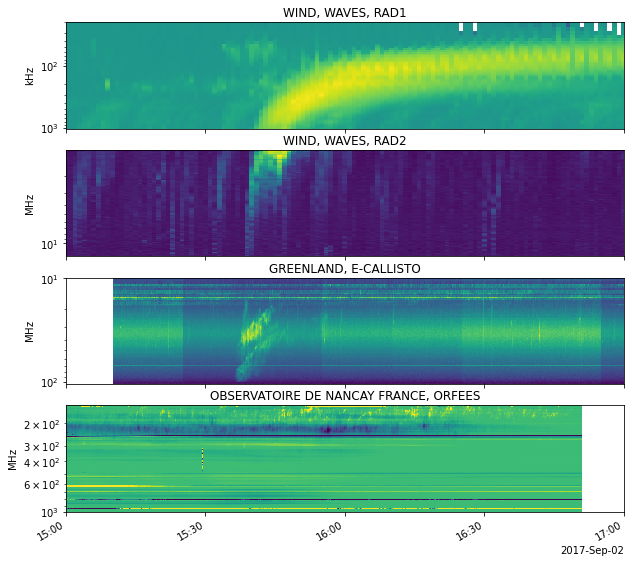

In [120]:
from datetime import datetime
from matplotlib.colors import LogNorm

# set up the plots 4 rows 1 column with sharinc common x-axis
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(10, 10))

waves_spec[0].plot(axes=axes[0], norm=LogNorm())
waves_spec[1].plot(axes=axes[1], norm=LogNorm())

[sp.plot(axes=axes[2]) for sp in callisto_specs]

vmm = np.percentile(orfee_spec_v.data, [1,99])
orfee_spec_v.plot(axes=axes[3], vmin=vmm[0], vmax=vmm[1])

# by default y-axis low to hight flip so moving away fro sun with time
[axes[i].set_ylim(reversed(axes[i].get_ylim())) for i in range(4)]

# log y-axis
[axes[i].set_yscale('log') for i in range(4)]

# reduce time range
axes[1].set_xlim(datetime(2017, 9, 2, 15), datetime(2017, 9, 2, 17))

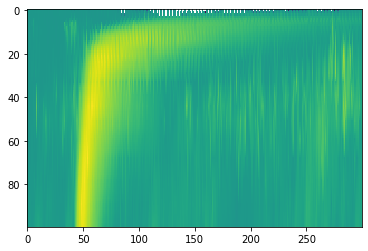

In [121]:
plt.imshow(waves_spec[0].data[0:100,900:1200], aspect='auto', interpolation='none', norm=LogNorm())

In [124]:
waves_spec[0].background

AttributeError: 'MetaDict' object has no attribute 'bg'